# Sprint 05. Tasca 01. Mètodes de mostreig
## By José Manuel Castaño

## - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Agafo el dataset credit cards customers amb informació d'usuaris de credit cards

In [7]:
creditcard = pd.read_csv('BankChurners.csv')

In [8]:
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Eliminem algunes columnes per recomanació del creador de l'arxiu.
Cambiem alguns noms de les columnes per fer-los més inteligibles i operatius

In [9]:
creditcard.drop(creditcard.columns[[16,19,21,22]], axis='columns', inplace=True)

In [10]:
creditcard.rename(columns={'Total_Relationship_Count':'Total_Products', 'Months_Inactive_12_mon':'Months_Inactive','Contacts_Count_12_mon':'Contacts_Count',
                           'Total_Revolving_Bal':'Revolving', 'Avg_Open_To_Buy':'Open_To_Buy','Total_Trans_Ct':'Transaction_Count','Total_Trans_Amt':'Transaction_Amount',
                           'Avg_Utilization_Ratio':'Utilization_Ratio'}, inplace=True)
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


Abans de començar el mostreig, fem un petit anàlisi de les dades

In [39]:
creditcard.isnull().sum()

CLIENTNUM             0
Attrition_Flag        0
Customer_Age          0
Gender                0
Dependent_count       0
Education_Level       0
Marital_Status        0
Income_Category       0
Card_Category         0
Months_on_book        0
Total_Products        0
Months_Inactive       0
Contacts_Count        0
Credit_Limit          0
Revolving             0
Open_To_Buy           0
Transaction_Amount    0
Transaction_Count     0
Utilization_Ratio     0
dtype: int64

No hi ha nulls

In [37]:
creditcard.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,4404.09,64.86,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,3397.13,23.47,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,510.00,10.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,2155.50,45.00,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,3899.00,67.00,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,4741.00,81.00,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,18484.00,139.00,1.00


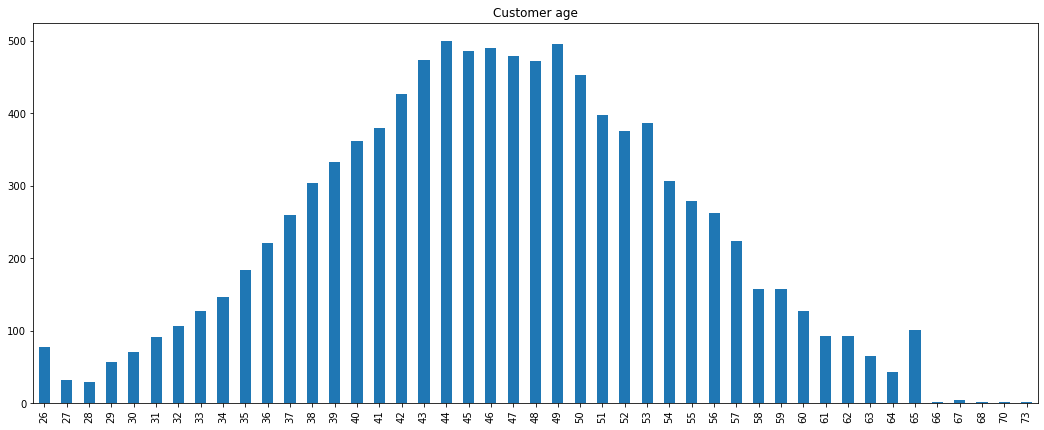

In [6]:
plt.rcParams["figure.figsize"] = (18, 7)
creditcard['Customer_Age'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Customer age');

Veiem una distribució unimodal, simètrica, amb la mitja i mediana molt similars.

In [87]:
creditcard['Gender'].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [7]:
creditcard['Education_Level'].value_counts(normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

In [8]:
creditcard['Income_Category'].value_counts(normalize=True)

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

Veiem que el 35% dels ingressos són alts (>80k) i el 35% són baixos (<40k)

In [9]:
creditcard['Marital_Status'].value_counts(normalize=True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [31]:
creditcard['Card_Category'].value_counts(normalize=True)

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

In [46]:
creditcard['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

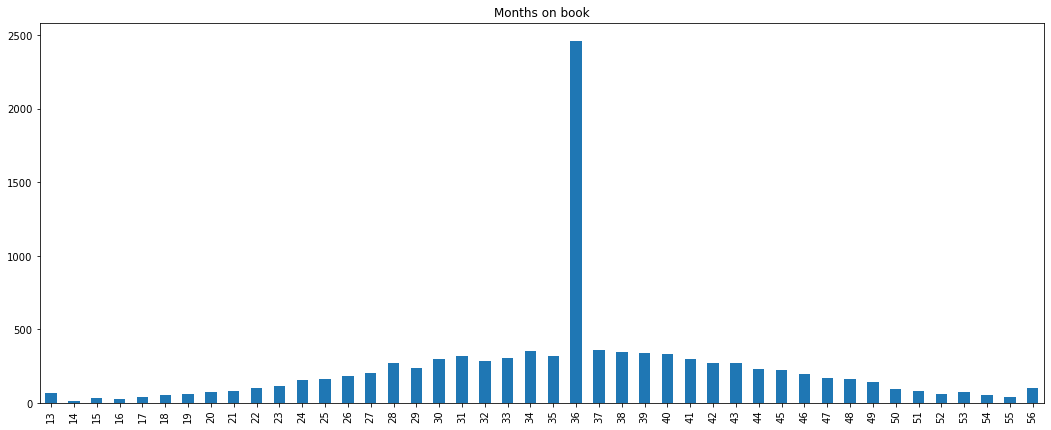

In [71]:
plt.rcParams["figure.figsize"] = (18, 7)
creditcard['Months_on_book'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Months on book');

Veiem que fa 36 mesos es va produir una gran captació de clients. potser una fusió bancària o una promoció agresiva.  
S'observa una distribució unimodal, simètrica, amb la mitja i mediana molt similars.  
Si fos el gestor del banc estaria preocupat per la clara desaceleració continuada en la contractació de de nous clients desde fa 36 mesos. No tenim dades de clients mes nous dels 13 mesos, no sabem si han invertit la tendència

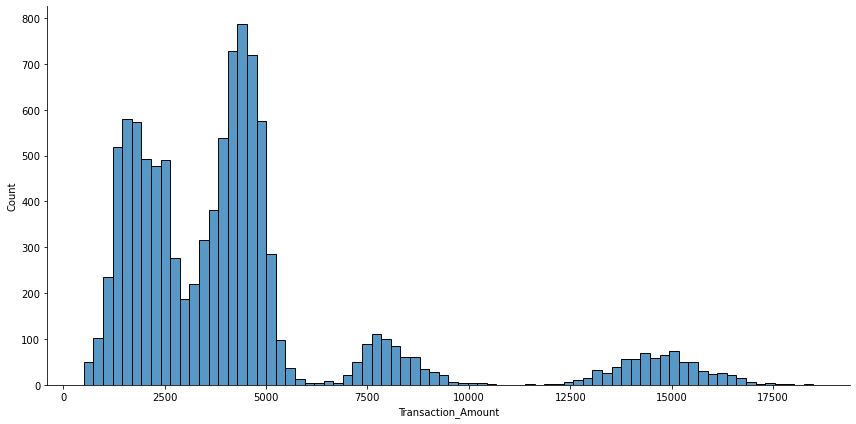

In [77]:
sns.displot(x='Transaction_Amount', data=creditcard, height=6, aspect=2);

Sembla una distribució amb 4-modal

Generem una **mostra aleatoria simple** agafant el 10% del registres

In [5]:
sample_aleatoria_10 = creditcard.sample(1014)
sample_aleatoria_10

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
6577,714960408,Attrited Customer,44,F,3,College,Single,Less than $40K,Blue,34,4,3,1,1605.0,890,715.0,2722,45,0.555
2969,715921758,Existing Customer,36,M,2,College,Single,$60K - $80K,Blue,25,5,3,2,1438.3,0,1438.3,2882,68,0.000
7701,717773433,Existing Customer,57,F,0,Graduate,Married,Less than $40K,Blue,45,6,1,2,2448.0,0,2448.0,5464,98,0.000
9290,716247708,Existing Customer,51,M,4,College,Single,$120K +,Gold,33,2,2,2,34516.0,1848,32668.0,14149,103,0.054
5212,708681708,Attrited Customer,51,F,2,Unknown,Single,Less than $40K,Blue,43,5,3,2,3245.0,0,3245.0,1977,29,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,796791258,Existing Customer,50,M,1,Uneducated,Married,$120K +,Blue,44,5,2,4,3104.0,1791,1313.0,4006,76,0.577
8788,769152783,Attrited Customer,60,F,2,High School,Single,Less than $40K,Blue,54,1,6,2,8141.0,1811,6330.0,5043,53,0.222
1619,710263608,Existing Customer,53,F,3,High School,Married,Unknown,Blue,36,4,2,4,11098.0,821,10277.0,2156,46,0.074
6632,780567408,Existing Customer,47,F,3,Graduate,Divorced,Less than $40K,Blue,38,5,1,2,3027.0,1671,1356.0,3912,77,0.552


Generem una mostra sistemàtica d'aproximadament un 10% dels registres

In [6]:
inici = np.random.randint(1, 10)
sample_systematic_10 = creditcard[inici : len(creditcard) : 10]
sample_systematic_10

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1348,27,0.230
25,771071958,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,28,6,1,2,7768.0,1669,6099.0,1051,22,0.215
35,715318008,Existing Customer,55,F,1,College,Single,Less than $40K,Blue,36,4,2,1,3520.0,1914,1606.0,1407,43,0.544
45,712661433,Existing Customer,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.0,0,34516.0,1444,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,717714633,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,38,4,3,4,14938.0,0,14938.0,15277,131,0.000
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,4,1,3,34516.0,1099,33417.0,15490,110,0.032
10105,709646433,Attrited Customer,59,F,1,High School,Married,Less than $40K,Blue,50,1,4,3,5043.0,743,4300.0,10170,66,0.147
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.0,1558,4081.0,16628,109,0.276


Per tal de fer una avaluació de la bondat de les 2 mostres, comparem la mitjana de cada mostra amb la mitjana del total de la població

In [7]:
comparativa=pd.concat([creditcard.mean(),sample_aleatoria_10.mean(), sample_systematic_10.mean()], keys=['poblacio','mostra_aleatoria','mostra_sistemica'],axis=1)
comparativa

C:\Users\joseb\AppData\Local\Temp/ipykernel_4888/423228879.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comparativa=pd.concat([creditcard.mean(),sample_aleatoria_10.mean(), sample_systematic_10.mean()], keys=['poblacio','mostra_aleatoria','mostra_sistemica'],axis=1)


,poblacio,mostra_aleatoria,mostra_sistemica
CLIENTNUM,7.391776e+08,7.383346e+08,7.394867e+08
Customer_Age,4.632596e+01,4.630868e+01,4.630997e+01
Dependent_count,2.346203e+00,2.404339e+00,2.322804e+00
Months_on_book,3.592841e+01,3.589842e+01,3.602172e+01
Total_Products,3.812580e+00,3.835306e+00,3.787759e+00
Months_Inactive,2.341167e+00,2.315582e+00,2.405726e+00
Contacts_Count,2.455317e+00,2.515779e+00,2.511352e+00
Credit_Limit,8.631954e+03,8.101983e+03,8.757829e+03
Revolving,1.162814e+03,1.124204e+03,1.123293e+03
Open_To_Buy,7.469140e+03,6.977779e+03,7.634535e+03


Afegim 2 columnes amb el increment porcentual de cada mostreig respecte a la població total

In [8]:
comparativa['inc_aleatoria %'] = (comparativa.mostra_aleatoria - comparativa.poblacio)*100/comparativa.poblacio
comparativa['inc_sistemica %'] = (comparativa.mostra_sistemica - comparativa.poblacio)*100/comparativa.poblacio
comparativa

,poblacio,mostra_aleatoria,mostra_sistemica,inc_aleatoria %,inc_sistemica %
CLIENTNUM,7.391776e+08,7.383346e+08,7.394867e+08,-0.114041,0.041815
Customer_Age,4.632596e+01,4.630868e+01,4.630997e+01,-0.037305,-0.034516
Dependent_count,2.346203e+00,2.404339e+00,2.322804e+00,2.477877,-0.997342
Months_on_book,3.592841e+01,3.589842e+01,3.602172e+01,-0.083464,0.259707
Total_Products,3.812580e+00,3.835306e+00,3.787759e+00,0.596066,-0.651032
Months_Inactive,2.341167e+00,2.315582e+00,2.405726e+00,-1.092845,2.757530
Contacts_Count,2.455317e+00,2.515779e+00,2.511352e+00,2.462477,2.282188
Credit_Limit,8.631954e+03,8.101983e+03,8.757829e+03,-6.139634,1.458243
Revolving,1.162814e+03,1.124204e+03,1.123293e+03,-3.320386,-3.398727
Open_To_Buy,7.469140e+03,6.977779e+03,7.634535e+03,-6.578541,2.214388


In [9]:
comparativa[['inc_aleatoria %','inc_sistemica %']].abs().mean()

inc_aleatoria %    1.81051
inc_sistemica %    1.45214
dtype: float64

De la comparació de la mitjana de les diferents variables entre les dues mostres i el total de la població tenim:
- Les diferències percentuals de les mitjes de les diferents variables respecte a les mostres és inferior al 4,1%
- La mostra aleatoria i la mostra sistèmica presenten un error similar respecte a la població.

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

A l'exercici anterior hem vist les distribucions de les diferents variables. 
Teninm 6 variables susceptibles d'estratificar : Gender, Education_Level, Income_Category, Card_Category, attritio_Flag i Marital_Status.
Descartem Gender perque el nombre d'observacions dels estrats són similars.  
Sense altre informació de com poden influir els estrats de dels diferents variables, agafarem per estratificar **Income_Category** perquè probablement el nivell d'ingressos afecti als diferents ratis bancaris

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(creditcard, test_size=0.10, stratify=creditcard[['Income_Category']])
Xtest

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
3293,814489683,Existing Customer,34,F,2,Unknown,Single,Less than $40K,Blue,29,3,1,0,5387.0,795,4592.0,2596,59,0.148
2247,797753283,Existing Customer,34,F,1,High School,Married,Less than $40K,Blue,28,4,3,4,2707.0,2036,671.0,1926,33,0.752
9846,758753283,Attrited Customer,52,M,3,Doctorate,Married,$120K +,Blue,45,1,3,3,34516.0,550,33966.0,7341,71,0.016
5523,720941433,Attrited Customer,53,F,3,High School,Married,Less than $40K,Blue,41,3,3,2,1547.0,0,1547.0,2312,43,0.000
2607,755943033,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,27,4,1,1,1901.0,1176,725.0,2450,52,0.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,717585858,Existing Customer,35,F,4,High School,Single,Unknown,Blue,24,5,2,4,16915.0,1679,15236.0,2795,55,0.099
9501,789394833,Existing Customer,47,M,2,Unknown,Divorced,$80K - $120K,Blue,37,1,2,2,21714.0,1969,19745.0,13270,104,0.091
570,709040508,Existing Customer,57,M,4,Uneducated,Married,$120K +,Blue,38,6,6,2,19802.0,1961,17841.0,2244,58,0.099
2840,803231058,Existing Customer,53,M,3,High School,Single,Less than $40K,Blue,47,5,1,1,3351.0,1474,1877.0,4294,66,0.440


Anem a comprobar si la mostra amb el stratify segueix els percentatges de la població

In [17]:
pd.concat([creditcard['Income_Category'].value_counts(normalize=True), Xtest['Income_Category'].value_counts(normalize=True)], keys=['poblacio','mostra_estratificada'],axis=1)

,poblacio,mostra_estratificada
Less than $40K,0.351634,0.351431
$40K - $60K,0.176755,0.176703
$80K - $120K,0.151575,0.152024
$60K - $80K,0.138442,0.138203
Unknown,0.109805,0.109576
$120K +,0.071788,0.072063


**Efectivament!!!** La mostra estratificada té la mateixa distribució en quant a **Income_Category** que la població

Fem **smote**. Instalem el mòdul **imbalanced_learn**

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE

Creem un nou dataframe on no tinguem columnes string, excepte la columna que anem a balancejar (Attrion_Flag)

In [55]:
creditcard_smote=creditcard.drop(creditcard.columns[[0,3,5,6,7,8]], axis='columns')
creditcard_smote

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,2,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,Attrited Customer,41,2,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,Attrited Customer,44,1,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,Attrited Customer,30,2,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


Transformem Attrition_Flag segons els seus valors: Existing Customer=0, Attritied Customer=1

In [56]:
creditcard_smote['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [58]:
#Transformem Attrition_Flag segons els seus valors: Existing Customer=0, Attritied Customer=1
creditcard_smote['Attrition_Flag'] = creditcard_smote['Attrition_Flag'].apply(lambda x: 0 if x=='Existing Customer' else 1)
creditcard_smote

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,0,51,3,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,0,40,3,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [59]:
creditcard_smote.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [61]:
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(creditcard_smote, creditcard_smote['Attrition_Flag'])

In [62]:
X_smote

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,0,45,3,39,5,1,3,12691.000000,777,11914.000000,1144,42,0.061000
1,0,49,5,44,6,1,2,8256.000000,864,7392.000000,1291,33,0.105000
2,0,51,3,36,4,1,0,3418.000000,0,3418.000000,1887,20,0.000000
3,0,40,4,34,3,4,1,3313.000000,2517,796.000000,1171,20,0.760000
4,0,40,3,21,5,1,0,4716.000000,0,4716.000000,816,28,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,41,2,31,3,2,2,1820.221702,1370,449.431665,2098,51,0.754003
16996,1,50,1,35,3,3,2,8570.245023,2507,6062.755535,7875,70,0.293152
16997,1,33,1,24,2,2,3,6072.926920,0,6072.926920,9291,60,0.000000
16998,1,41,1,35,3,2,3,1586.552643,263,1322.643624,2296,45,0.166241


In [64]:
X_smote.Attrition_Flag.value_counts()

0    8500
1    8500
Name: Attrition_Flag, dtype: int64

Podem comprobar que ha augmentat els Attrited Customer fins als 8500 per que siguin els mateixos que de Existing Customer 

## - Exercici 3

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

A partir de l'algoritme suministrat per aplicar el mètode Reservoir sampling, l'adapto segons:
- El generador que utilitzo és l'iterable range(), que em genera números consecutius des del 0 fins a la longitut del DF
- En reservoir guardo el números generats que corresponguin segons el mètodo Reservoir sampling
- Faig servir els números guardats a reservoir com a index dels registres del sampling
- El tamany del sample serà del 10% de la població

Es a dir, simulo que em van arribant els registres des de el primer fins a l'últim i els aplico el Reservoir sampling

In [18]:
import random

k=int(len(creditcard)*0.1)                    #Agafa una mostra del 10%
print('sampling size: {0}'.format(k))
reservoir = []
for i in range(len(creditcard)):
    if i+1<= k:
        reservoir.append(i)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            reservoir[random.choice(range(0,k))] = i
reservoir

sampling size: 1012


[4093,
 9907,
 1712,
 1221,
 1361,
 1947,
 6628,
 2347,
 3403,
 8574,
 4538,
 11,
 1933,
 7048,
 10108,
 6364,
 8140,
 2859,
 3088,
 9511,
 6404,
 6751,
 1384,
 5328,
 8520,
 3312,
 26,
 9946,
 9654,
 2893,
 7144,
 1802,
 9606,
 9044,
 7950,
 5297,
 2570,
 9111,
 4785,
 8640,
 2204,
 41,
 2133,
 6127,
 9232,
 4461,
 2612,
 9903,
 2648,
 3591,
 9068,
 4100,
 1996,
 5141,
 1763,
 6935,
 6369,
 5767,
 9169,
 3504,
 6174,
 61,
 6807,
 2222,
 64,
 4299,
 9776,
 4989,
 9115,
 5703,
 9048,
 1642,
 1768,
 3782,
 2235,
 5705,
 76,
 6480,
 5530,
 7631,
 5624,
 2776,
 2979,
 2372,
 3561,
 8158,
 2736,
 3374,
 1979,
 1254,
 1918,
 2962,
 92,
 7784,
 9190,
 3205,
 8161,
 4765,
 7096,
 7756,
 7539,
 3334,
 102,
 4502,
 104,
 5840,
 5233,
 7114,
 5105,
 1610,
 110,
 6816,
 2209,
 7104,
 2863,
 1992,
 3370,
 5485,
 7582,
 6073,
 2153,
 10056,
 1535,
 2580,
 3306,
 2069,
 126,
 1226,
 9266,
 1607,
 8912,
 2870,
 132,
 8817,
 3986,
 135,
 8182,
 8117,
 8284,
 4355,
 2384,
 4549,
 6995,
 3617,
 1131,
 70

In [19]:
creditcard.iloc[reservoir]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
4093,713138433,Existing Customer,50,M,3,Graduate,Single,$60K - $80K,Blue,42,4,2,3,14782.0,1020,13762.0,3206,54,0.069
9907,714543633,Attrited Customer,45,F,3,Unknown,Single,Less than $40K,Blue,36,1,2,5,7500.0,0,7500.0,8024,78,0.000
1712,772452783,Existing Customer,43,M,3,Unknown,Married,$40K - $60K,Blue,33,6,1,2,4402.0,1640,2762.0,1774,46,0.373
1221,780605508,Existing Customer,53,M,1,Unknown,Married,$40K - $60K,Blue,41,5,1,3,2885.0,1433,1452.0,1170,23,0.497
1361,783364233,Existing Customer,59,M,0,Graduate,Married,$40K - $60K,Blue,53,3,2,3,4241.0,0,4241.0,1798,45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,811889808,Existing Customer,43,M,3,Graduate,Married,$80K - $120K,Blue,38,3,5,1,23459.0,2305,21154.0,7279,83,0.098
4124,755593983,Existing Customer,50,F,1,Graduate,Married,Unknown,Blue,43,6,1,2,7985.0,0,7985.0,3873,72,0.000
2104,795052083,Existing Customer,63,F,0,Uneducated,Single,$40K - $60K,Blue,56,3,6,4,1438.3,0,1438.3,3630,71,0.000
3824,785134758,Existing Customer,41,M,2,College,Unknown,$80K - $120K,Blue,24,3,2,4,14320.0,0,14320.0,4077,77,0.000
